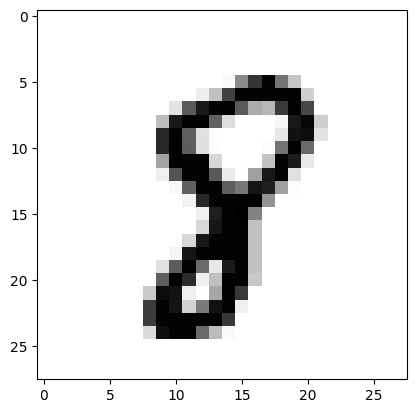

In [90]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential,load_model,model_from_json
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation
from keras.utils import to_categorical


(x_train,y_train),(x_test,y_test) = mnist.load_data() #讀取mnist數據庫(有6萬筆訓練資料、1萬筆測試資料)
plt.imshow(x_train[94],cmap='Greys') #測試地94筆資料

1. DNN手寫辨識

In [82]:
#資料前處理
x_train = x_train.reshape(60000,784) #將二維資料轉換成一維資料
x_test = x_test.reshape(10000,784)
x_train = x_train/255 #除以255將值壓所在0-1之間(正規化)
x_test = x_test/255
y_train = to_categorical(y_train) #使用one-hot-encoding進行轉換
y_test = to_categorical(y_test)

DNN手寫辨識
Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.2715 - accuracy: 0.9216 - val_loss: 0.1315 - val_accuracy: 0.9580
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1020 - accuracy: 0.9688 - val_loss: 0.1046 - val_accuracy: 0.9672
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0685 - accuracy: 0.9792 - val_loss: 0.0768 - val_accuracy: 0.9757
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0700 - val_accuracy: 0.9784
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0725 - val_accuracy: 0.9776
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0669 - val_accuracy: 0.9799
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0206 - accuracy: 0.9938 - val_loss: 0.0746 - val_accuracy: 0

<Figure size 640x480 with 0 Axes>

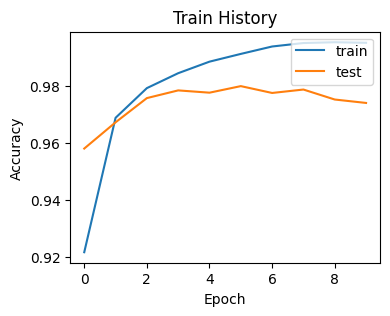

In [83]:
print("DNN手寫辨識")

#建立模型
model = Sequential()
#輸入層與隱藏層
model.add(Dense(units=256,input_dim=784,activation='relu'))
#隱藏層
model.add(Dense(units=128,activation='relu'))
#輸出層
model.add(Dense(units=10,activation='softmax'))
#定義訓練方式
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#開始訓練
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

def save_train_history(train_acc,test_acc,filename):
  plt.clf()
  plt.figure(figsize=(4,3))
  plt.plot(history.history[train_acc])
  plt.plot(history.history[test_acc])
  plt.title('Train History')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train','test'], loc='upper right')
save_train_history('accuracy','val_accuracy','acc.png')

<Figure size 640x480 with 0 Axes>

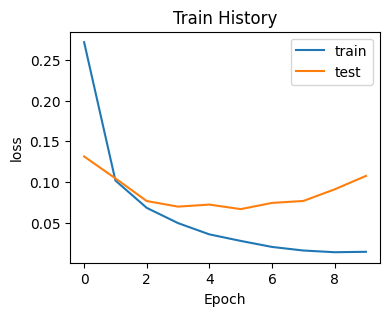

In [84]:
def save_train_history2(train_loss,test_loss,filename):
  plt.clf()
  plt.figure(figsize=(4,3))
  plt.plot(history.history[train_loss])
  plt.plot(history.history[test_loss])
  plt.title('Train History')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['train','test'], loc='upper right')
save_train_history2('loss','val_loss','loss.png')

2. CNN手寫辨識

In [98]:
#資料前處理
x_train = x_train.reshape(60000, 28, 28, 1)#CNN的輸入為(長,寬,色彩)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train/255 #除以255將值壓所在0-1之間(正規化)
x_test = x_test/255
y_train = to_categorical(y_train) #使用one-hot-encoding進行轉換
y_test = to_categorical(y_test)

CNN手寫辨識
Epoch 1/10
469/469 [==============================] - 33s 67ms/step - loss: 0.4038 - accuracy: 0.8808 - val_loss: 0.1841 - val_accuracy: 0.9451
Epoch 2/10
469/469 [==============================] - 32s 67ms/step - loss: 0.1580 - accuracy: 0.9547 - val_loss: 0.1111 - val_accuracy: 0.9681
Epoch 3/10
469/469 [==============================] - 33s 69ms/step - loss: 0.1053 - accuracy: 0.9699 - val_loss: 0.0880 - val_accuracy: 0.9738
Epoch 4/10
469/469 [==============================] - 30s 63ms/step - loss: 0.0813 - accuracy: 0.9771 - val_loss: 0.0748 - val_accuracy: 0.9775
Epoch 5/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0657 - accuracy: 0.9812 - val_loss: 0.0633 - val_accuracy: 0.9801
Epoch 6/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0568 - accuracy: 0.9838 - val_loss: 0.0611 - val_accuracy: 0.9815
Epoch 7/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0505 - accuracy: 0.9855 - val_loss: 0.0550 - val_a

<Figure size 640x480 with 0 Axes>

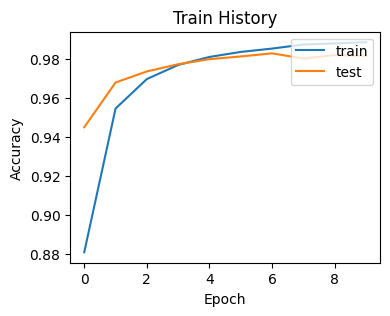

In [99]:
print("CNN手寫辨識")

#建構網路
model = Sequential()
#CNN輸入為28*28*1
model.add(Conv2D(32,kernel_size=3,input_shape=(28,28,1),padding="same",activation='relu'))
#池化層
model.add(MaxPooling2D(pool_size=2))
#攤平
model.add(Flatten())
#全連接層
model.add(Dense(16,activation='relu'))
#輸出層
model.add(Dense(10,activation='softmax'))
#定義訓練方式
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#開始訓練
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

def save_train_history(train_acc,test_acc,filename):
  plt.clf()
  plt.figure(figsize=(4,3))
  plt.plot(history.history[train_acc])
  plt.plot(history.history[test_acc])
  plt.title('Train History')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train','test'], loc='upper right')
save_train_history('accuracy','val_accuracy','acc.png')